# Insurance Churn Prediction
## Introduction
    Insurance companies around the world operate in a very competitive environment. With various aspects of data collected from millions of customers, it is painstakingly hard to analyze and understand the reason for a customer’s decision to switch to a different insurance provider.

    For an industry where customer acquisition and retention are equally important, and the former being a more expensive process, insurance companies rely on data to understand customer behavior to prevent retention. Thus knowing whether a customer is possibly going to switch beforehand gives Insurance companies an opportunity to come up with strategies to prevent it from actually happening.

# Explanation 
    Given are 16 distinguishing factors that can help in understanding the customer churn, your objective as a data scientist is to build a Machine Learning model that can predict whether the insurance company will lose a customer or not using these factors.

    You are provided with 16 anonymized factors (feature_0 to feature 15) that influence the churn of customers in the insurance industry



<font color = 'green'>
Content: 

1. [Import Libraries](#1)
1. [Load and Check Data](#2)
    
1. [Check Uniques, Data's Types And Counts](#3)
1. [Missing Value](#4)
1. [Check The Churn](#5)
1. [Visualization](#6)
1. [Variable Analysis](#7)
    * [Float Variable](#8)
    * [Integer Variable](#9)
1. [Basic Data Analysis](#10)
1. [Modelling](#11)
    * [Train-Test Split](#12)
    * [Confusion Matrix](#13)
    * [Logistic Regression](#14)
    * [SVC Classification](#15)
    * [Decision Tree Classification](#16)
    * [Naive Bayes Classification](#17)
    * [Ada Boost Classifier](#18)
    * [Gradient Boosting Classifier](#19)
    * [LGBM Classifier](#20)
    * [Random Forest Classifier](#21)
    * [Trial and Conclusion](#22)
1. [Medium Article](#23)
1. [Web Deploy](#24)    

 
<a id = "1"></a><br>
# 1-Importing The Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/sample_submission.xlsx
/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Train.csv
/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore",)  #Ignore certain system-wide alerts
from time import time, strftime, gmtime
start = time()
import datetime
print(str(datetime.datetime.now()))
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

2021-09-15 14:50:53.781416



<a id = "2"></a><br>
# 2-Load and Check Data

In [3]:
train_df = pd.read_csv('/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Train.csv')
test_df = pd.read_csv('/kaggle/input/insurance-churn-prediction-weekend-hackathon/Insurance_Churn_ParticipantsData/Test.csv')

#Using the read.csv code of the pandas library, 
#we read the train and test csv files and assign them to two variables called train_df and test_df.

In [4]:
print(train_df.shape)
print(test_df.shape)
print(train_df.size)
print(test_df.size)

# Seeing size, row and column counts in data with shape code and size code

(33908, 17)
(11303, 16)
576436
180848


In [5]:
train_df.head()

# Seeing first five row in train_df data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [6]:
test_df.head()

# Seeing first five row in test_df data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


In [7]:
train_df.rename(columns={"labels": "churn"}, inplace=True)
#we change label column name  with "chrun"

In [8]:
train_df.describe().T

#Check mean,avarage,median,min,max and std 

,count,mean,std,min,25%,50%,75%,max
feature_0,33908.0,-0.004158,0.999776,-2.159994,-0.747384,-0.182341,0.665225,5.091402
feature_1,33908.0,0.002584,1.014268,-3.081149,-0.422787,-0.297324,0.022901,33.094776
feature_2,33908.0,-0.000213,1.000872,-1.779108,-0.938003,0.023260,0.624050,1.825628
feature_3,33908.0,-0.000053,1.002512,-1.002478,-0.602517,-0.303517,0.236237,18.094700
feature_4,33908.0,-0.000298,1.003724,-0.569351,-0.569351,-0.246560,0.076230,19.443647
feature_5,33908.0,-0.004652,0.993984,-0.411453,-0.411453,-0.411453,-0.411453,8.127648
feature_6,33908.0,-0.007498,0.802696,-0.251940,-0.251940,-0.251940,-0.251940,23.625644
feature_7,33908.0,4.336381,3.273376,0.000000,1.000000,4.000000,7.000000,11.000000
feature_8,33908.0,1.171051,0.606730,0.000000,1.000000,1.000000,2.000000,2.000000
feature_9,33908.0,1.225345,0.749104,0.000000,1.000000,1.000000,2.000000,3.000000


<a id = "3"></a><br>
# 3-Check Uniques,Data's Types And Counts


In [9]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Uniques = df.apply(lambda x: x.unique().shape[0]) # If shape[0] is not written, it returns a list of unique values.
    cols = ['Types', 'Counts', 'Uniques']
    str = pd.concat([Types, Counts, Uniques], axis = 1, sort=True)
    str.columns = cols
    display(str.sort_values(by='Uniques', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df=train_df)

# check types,counts,unique of the data

,Types,Counts,Uniques
feature_1,float64,33908,6434
feature_3,float64,33908,1482
feature_5,float64,33908,517
feature_0,float64,33908,77
feature_4,float64,33908,47
feature_6,float64,33908,36
feature_2,float64,33908,31
feature_7,int64,33908,12
feature_14,int64,33908,12
feature_15,int64,33908,4


__________Data Types__________

int64      10
float64     7
Name: Types, dtype: int64


<a id = "4"></a><br>
# 4-Missing Value

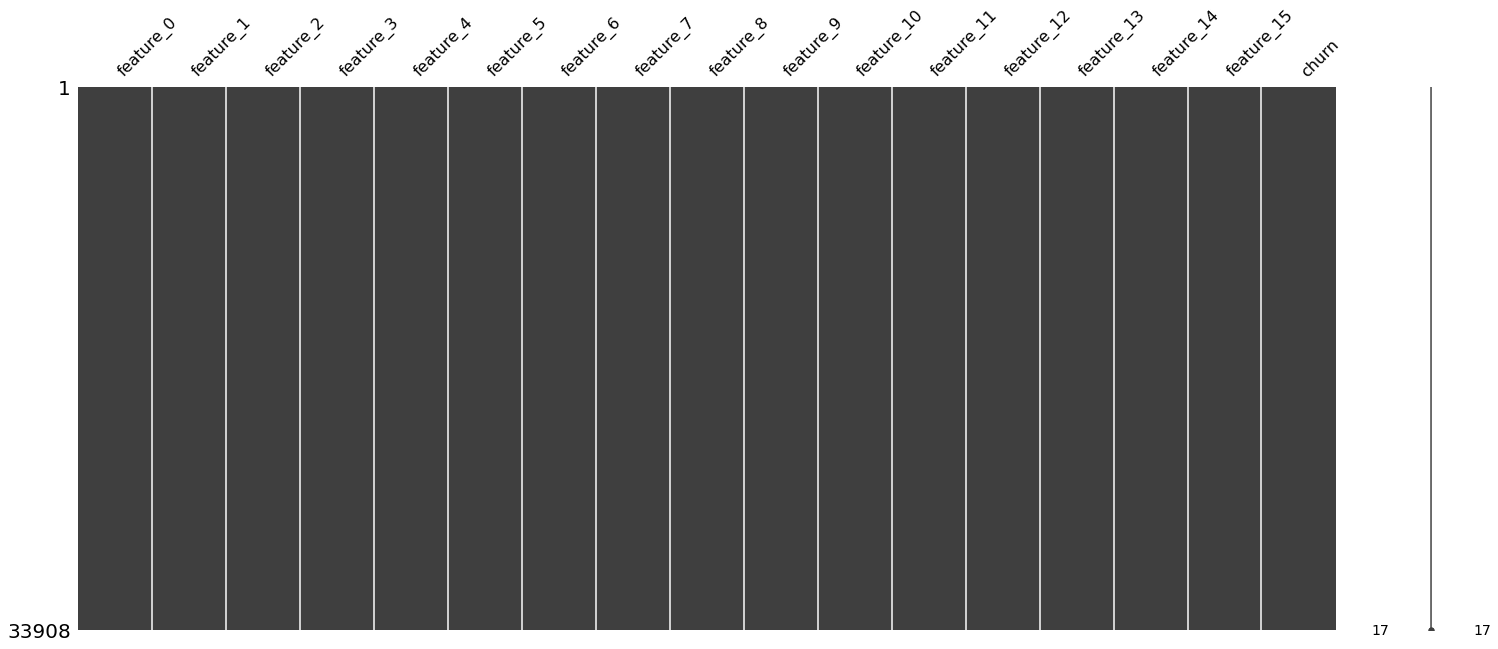

In [10]:
import missingno as msno

msno.matrix(train_df);

#Visualization of nan values


<a id = "5"></a><br>
# 5-Check The Churn

In [11]:
dataset = train_df["churn"].value_counts()
dataset

0    29941
1     3967
Name: churn, dtype: int64

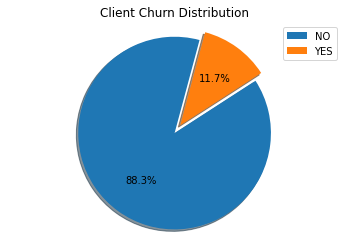

In [12]:
sizes = [29941,3967]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()
        
 #ratio of those who churn and those who don't



<a id = "6"></a><br>
# 6-Visualization


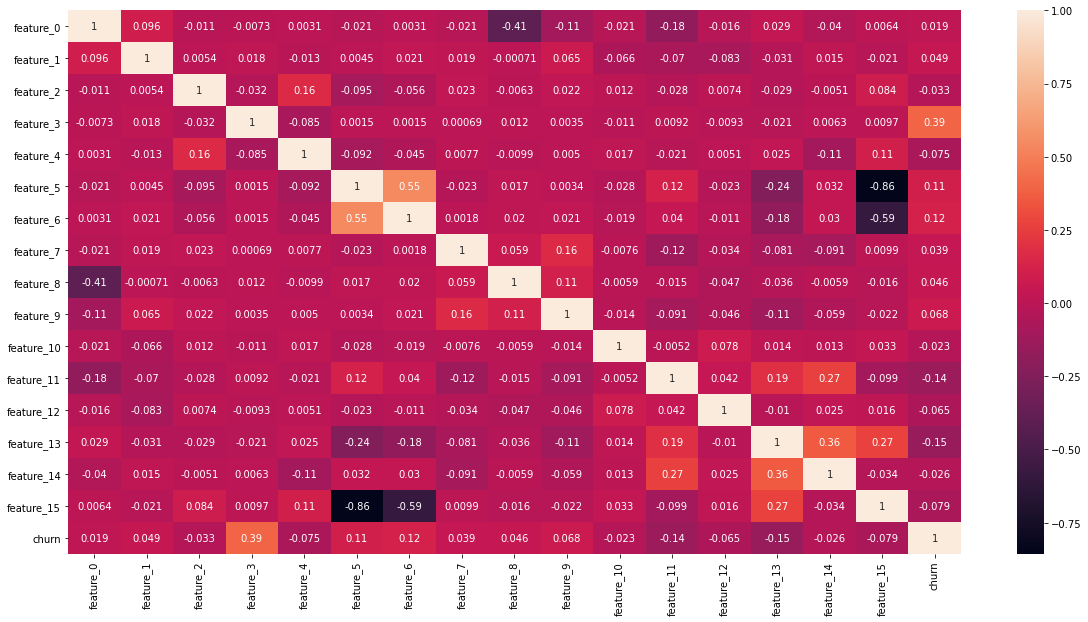

In [13]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(train_df,show_chart=True)

#Get Correlation of "churn" with other variables:

<AxesSubplot:>

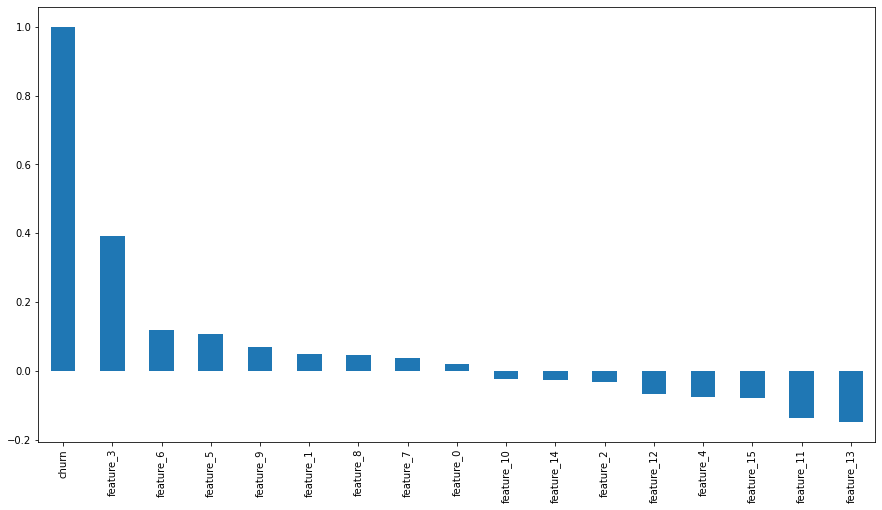

In [14]:
# Get Correlation of "churn" with other variables with sorted:
plt.figure(figsize=(15,8))
train_df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')


<a id = "7"></a><br>
# 7- Variable Analysis
* float Variable: 'feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6'
* integer  Variable: 'feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15


In [15]:
features = list(train_df.columns)
features.remove('churn')
features

#getting the column names and removing the churn column


['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15']

In [16]:
float_features = [i for i in train_df.columns if train_df[i].dtype == 'float64']
float_features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6']

In [17]:
int_features=[i for i in train_df.columns if train_df[i].dtype == 'int64']
int_features.remove('churn')
int_features

['feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15']

<a id = "8"></a><br>
## Float Variables

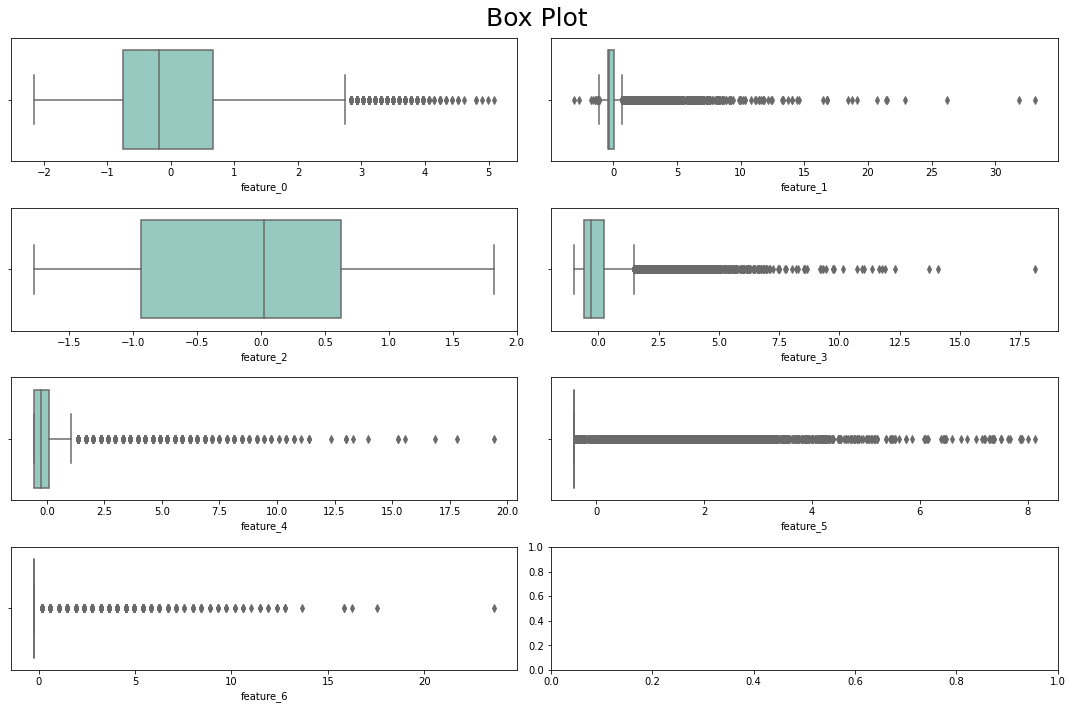

In [18]:
fig, ax = plt.subplots(4, 2, figsize = (15, 10))
ax = ax.flatten()
for i, c in enumerate(float_features):
    sns.boxplot(x = train_df[c], ax = ax[i], palette = 'Set3')
plt.suptitle('Box Plot', fontsize = 25)
fig.tight_layout()

#Box plot of float features

In [19]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

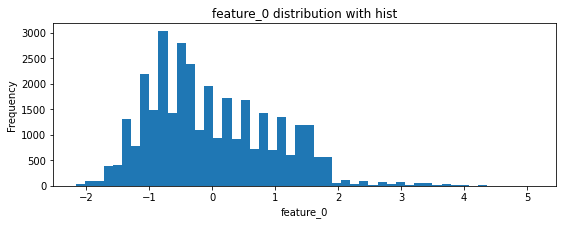

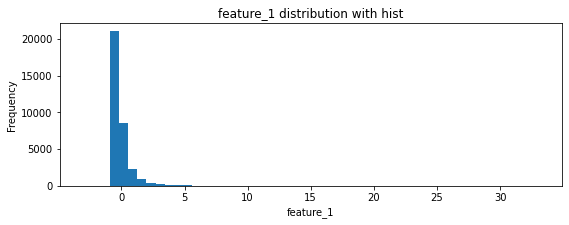

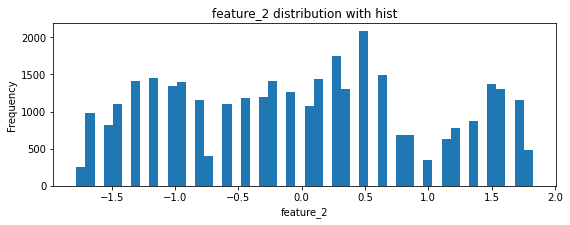

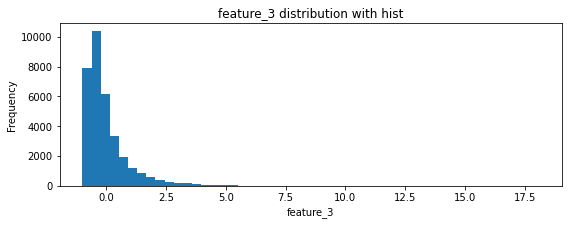

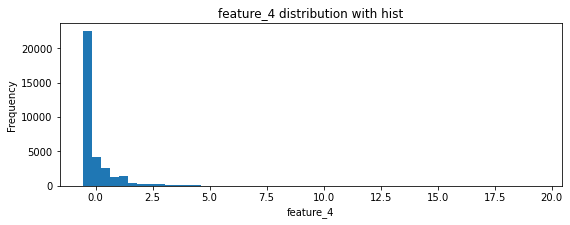

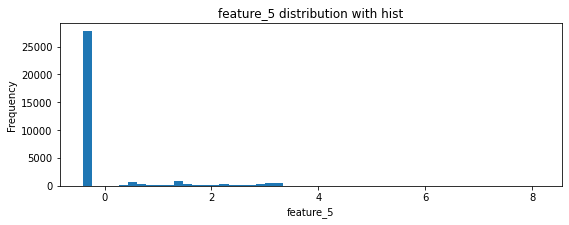

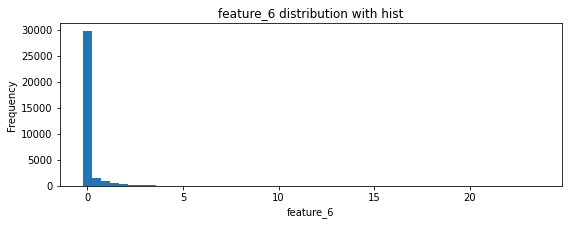

In [20]:
for n in float_features:
    plot_hist(n)


<a id = "9"></a><br>
## Integer Variables

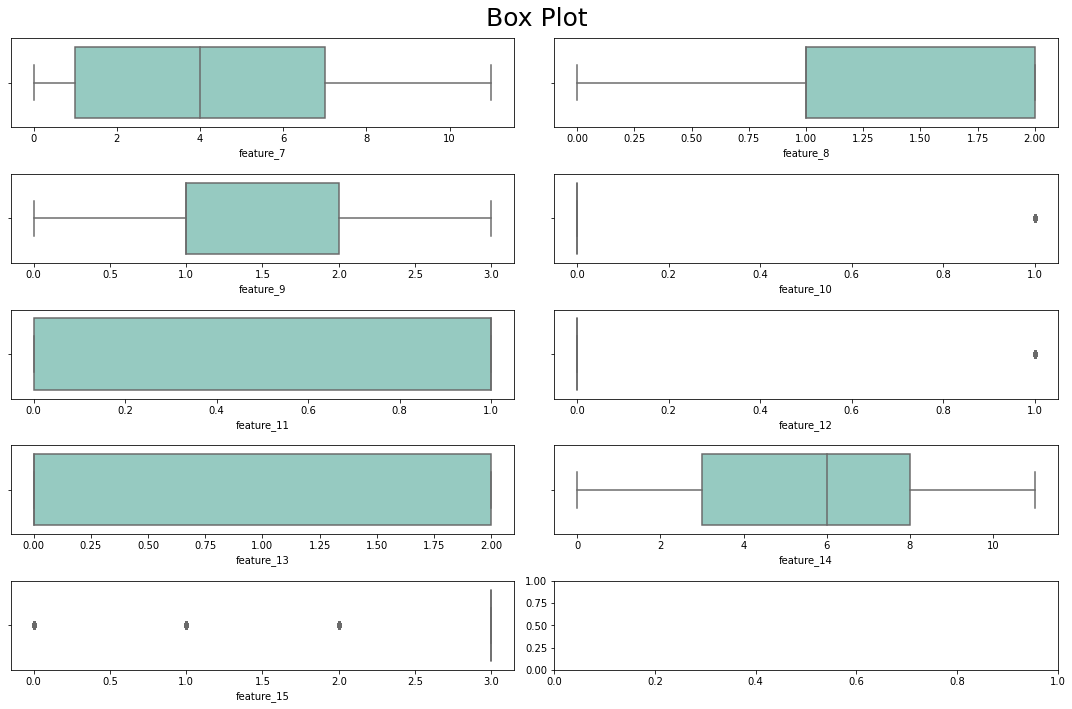

In [21]:
fig, ax = plt.subplots(5, 2, figsize = (15, 10))
ax = ax.flatten()
for i, c in enumerate(int_features):
    sns.boxplot(x = train_df[c], ax = ax[i], palette = 'Set3')
plt.suptitle('Box Plot', fontsize = 25)
fig.tight_layout()

#Box plot of integer features

In [22]:
def bar_plot(variable):
    """
        input: variable 
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of float variable(value/sample)
    varValue = var.value_counts()
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    



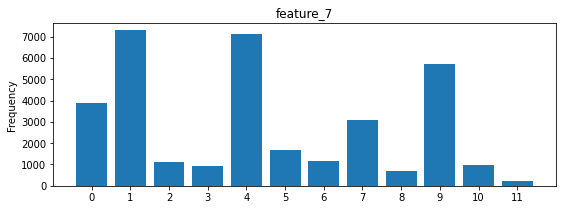

feature_7: 
 1     7286
4     7137
9     5691
0     3891
7     3094
5     1683
6     1164
2     1118
10     988
3      938
8      700
11     218
Name: feature_7, dtype: int64


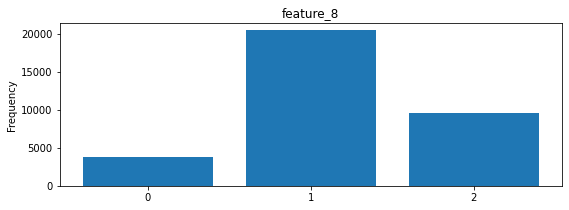

feature_8: 
 1    20434
2     9637
0     3837
Name: feature_8, dtype: int64


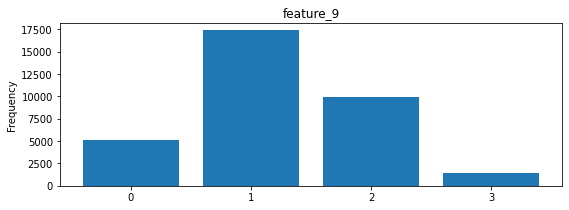

feature_9: 
 1    17380
2     9974
0     5147
3     1407
Name: feature_9, dtype: int64


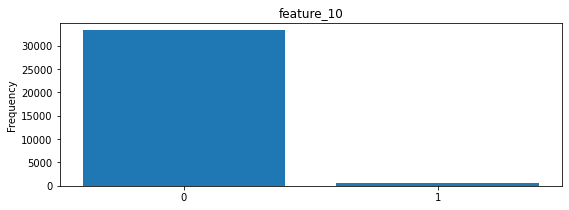

feature_10: 
 0    33293
1      615
Name: feature_10, dtype: int64


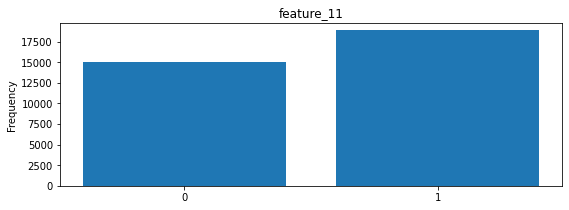

feature_11: 
 1    18836
0    15072
Name: feature_11, dtype: int64


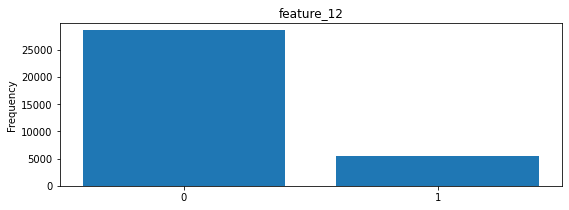

feature_12: 
 0    28494
1     5414
Name: feature_12, dtype: int64


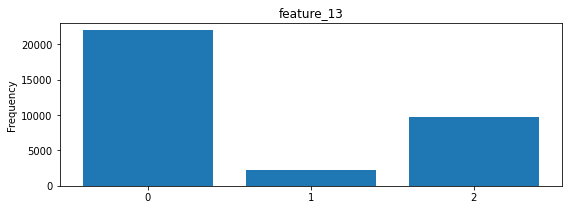

feature_13: 
 0    21978
2     9751
1     2179
Name: feature_13, dtype: int64


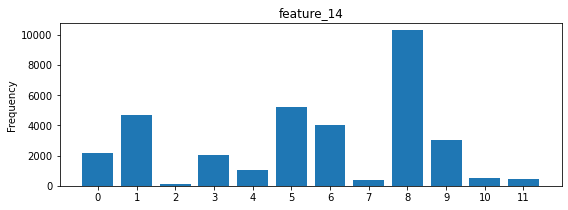

feature_14: 
 8     10273
5      5187
1      4672
6      4021
9      3005
0      2193
3      2013
4      1071
10      545
11      427
7       351
2       150
Name: feature_14, dtype: int64


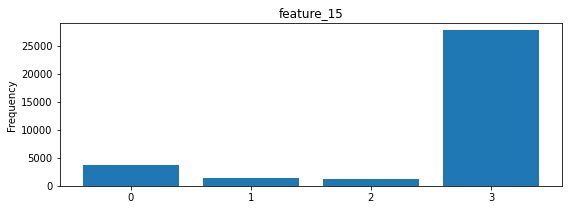

feature_15: 
 3    27756
0     3661
1     1365
2     1126
Name: feature_15, dtype: int64


In [23]:
for c in int_features:
    bar_plot(c)


<a id = "10"></a><br>
# 8-Basic Data Analysis

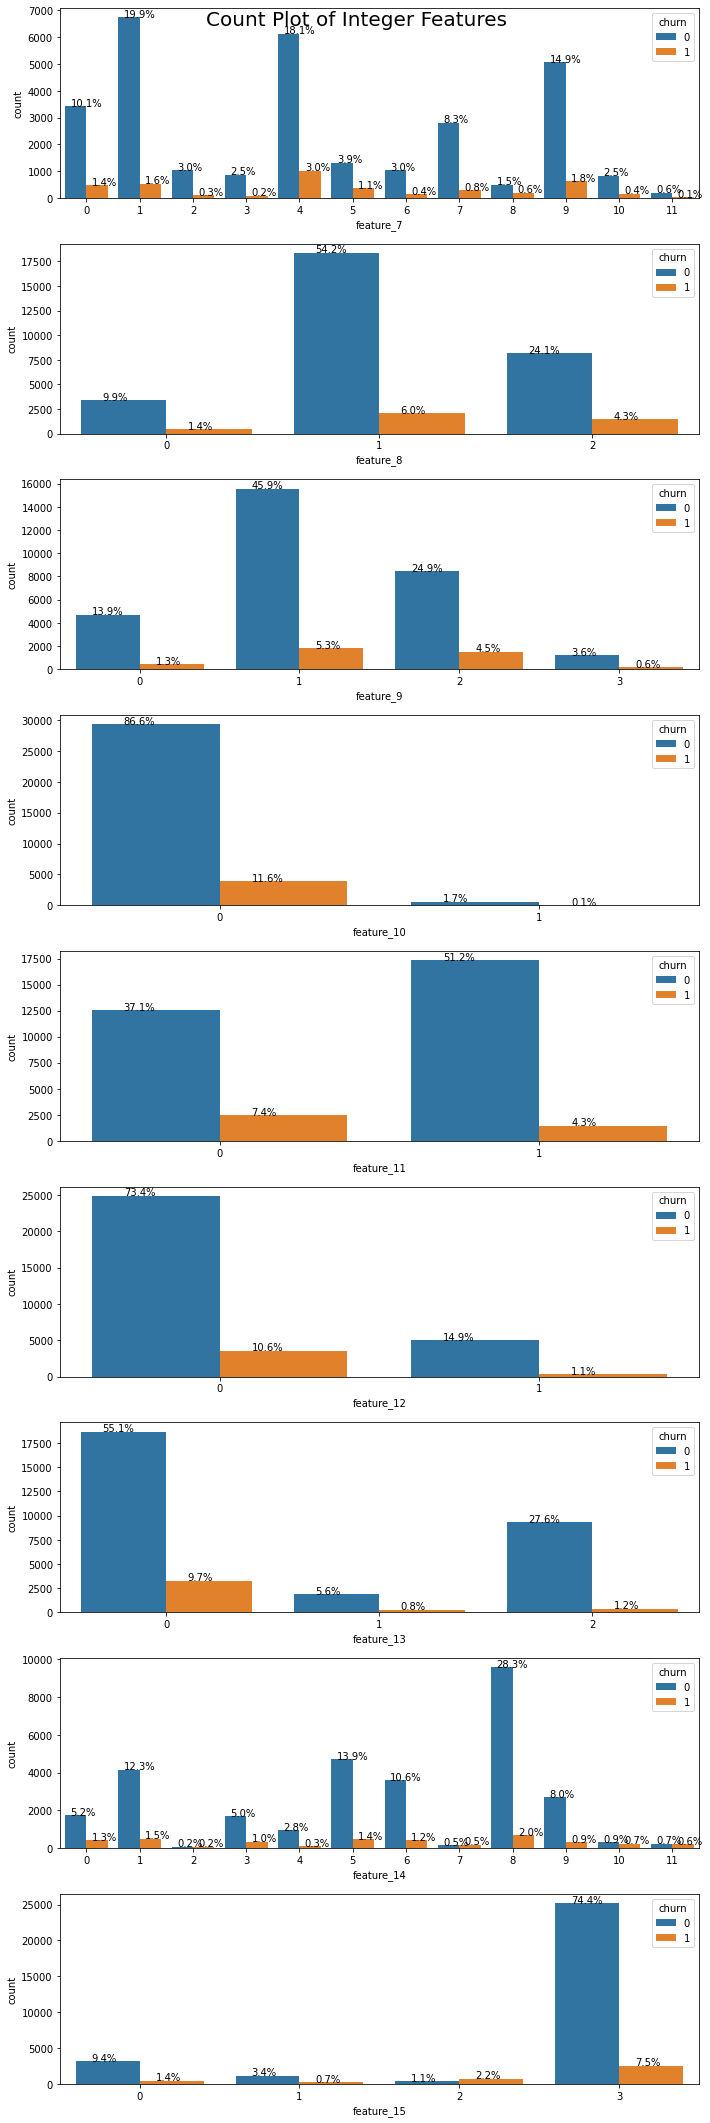

In [24]:
#In basic data analysis, we see the relationship between columns and Churn.
fig, ax = plt.subplots(9, 1, figsize = (10, 30))
ax = ax.flatten()
for i, c in enumerate(int_features):
    a = sns.countplot(x = train_df[c], ax = ax[i], hue = train_df['churn'])
    for p in a.patches:
        a.annotate('{:.1f}%'.format(100 * p.get_height() / len(train_df)), (p.get_x() + 0.1, p.get_height() + 5))
plt.suptitle('Count Plot of Integer Features', fontsize = 20)
fig.tight_layout()

<a id = "11"></a><br>
# 9-Modelling

<a id = "12"></a><br>
# Train and Test Split

In [25]:
#Split data into train and test sets
X = train_df.drop('churn', axis=1)
y = train_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

<a id = "13"></a><br>
# Confusion Matrix

In [26]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    
    return model

<a id = "14"></a><br>
# Logistic Regression

Logistic Regression
accuracy:  0.8926570333235034
precision:  0.5821596244131455
recall:  0.2134251290877797
f1_score:  0.8698874712409931


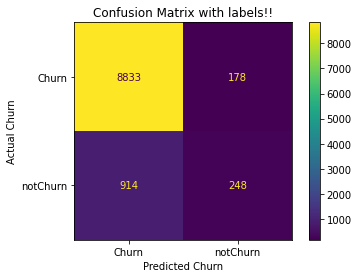

In [27]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

<a id = "15"></a><br>
# SVC Classification

SVC Classification
accuracy:  0.8938366263639045
precision:  0.6666666666666666
recall:  0.14113597246127366
f1_score:  0.8618708440155587


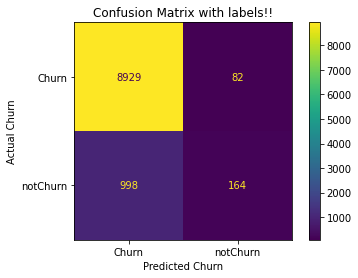

In [28]:
# Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

<a id = "16"></a><br>
# Decision Tree Classification

Decision Tree Classification
accuracy:  0.8733903469969527
precision:  0.4491935483870968
recall:  0.4793459552495697
f1_score:  0.8751708637589718


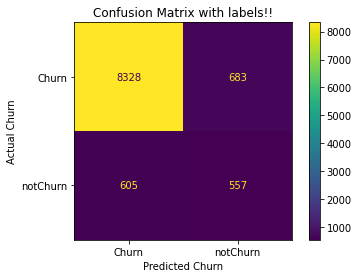

In [29]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

<a id = "17"></a><br>
# Naive Bayes Classification

Naive Bayes Classification
accuracy:  0.8361348668042858
precision:  0.3402909550917141
recall:  0.4629948364888124
f1_score:  0.8467000466804518


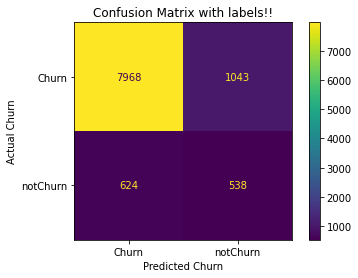

In [30]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

<a id = "18"></a><br>
# Ada Boost Classifier

Ada Boost Classifier
accuracy:  0.8989481962056424
precision:  0.6056782334384858
recall:  0.3304647160068847
f1_score:  0.8855324058874312


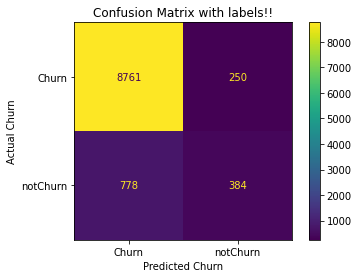

In [31]:
#Ada Boost Classifier
ad_model=modeling(AdaBoostClassifier, "Ada Boost Classifier")

<a id = "19"></a><br>
# Gradient Boosting Classifier

Gradient Boosting Classifier
accuracy:  0.9061240538680821
precision:  0.6502177068214804
recall:  0.3855421686746988
f1_score:  0.8953300535910279


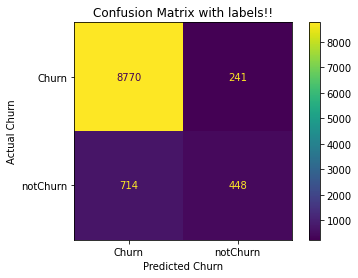

In [32]:
#Gradient Boosting Classifier
gbm_model=modeling(GradientBoostingClassifier, "Gradient Boosting Classifier")

<a id = "20"></a><br>
# LGBM Classifier

Light GBM
accuracy:  0.9133982109505554
precision:  0.6741016109045849
recall:  0.46815834767641995
f1_score:  0.9064277654300509


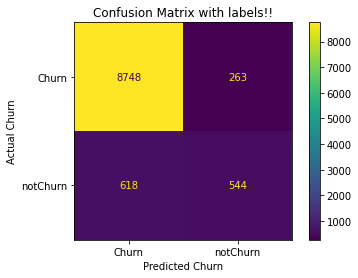

In [33]:
# LightGBM model
LGBM_model = modeling(lgb.LGBMClassifier, 'Light GBM')

<a id = "21"></a><br>
# Random Forest Classifier

In [34]:

# First i will try for Smote if it was not good mean we will apply for the undersampling
over = SMOTE()
X, y = over.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) 
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<a id = "22"></a><br>
# Trial and Conclusion 

In [35]:
clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.91      0.94      6018
           1       0.92      0.97      0.94      5959

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977



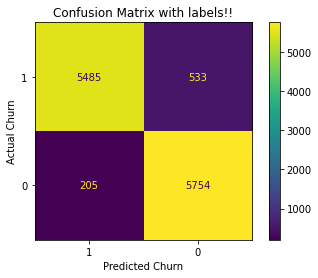

In [36]:
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['1', '0'])
cmd_obj.plot()
cmd_obj.ax_.set(
                    title='Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn'
                    )
plt.show()

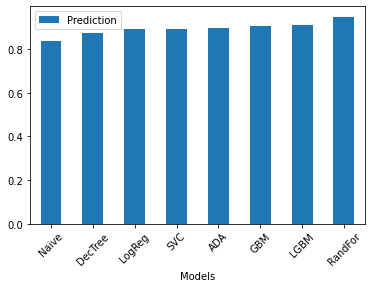

In [37]:
#Showing the accuracy of our models in the form of bar plots
df = pd.DataFrame({'Models':['Naive','DecTree','LogReg', 'SVC','ADA','GBM','LGBM','RandFor'], 'Prediction':[0.836,0.873, 0.892, 0.893 ,0.898,0.906,0.913,0.949]})
ax = df.plot.bar(x='Models', y='Prediction', rot=45)

In [38]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']

# <a id = "23"></a><br>
# 10- Medium Article

If you want to read my Medium article, you can view the medium link below.

https://medium.com/@bulentcaliskan283/how-to-implement-customer-churn-prediction-with-machine-learning-97ceaecba364

# <a id = "24"></a><br>
# 11-Web Deploy

You can view and run the web-deployed version from this site.

http://churnproject.herokuapp.com/

# <a id = "25"></a><br>
# 12-Github Page

You can check my github page for streamlit codes

https://github.com/caliskanbulent/web_insc/tree/master

In [39]:
finish = time()
print(strftime("%H:%M:%S", gmtime(finish - start)))

00:00:52
